In [1]:
%load_ext autoreload
%autoreload 2

from utils.preprocessing import create_time_matrix, create_caregivers_df, create_tasks_df, create_clients_df, create_continuity_df

caregivers = create_caregivers_df('data/raw/caregivers.csv')

tasks = create_tasks_df('data/raw/hemtjanst_tasks.csv', only_client_tasks=True)

clients = create_clients_df('data/raw/clients.csv')

drive_time_matrix = create_time_matrix('data/raw/duration_matrix_DRIVE.csv')
walk_time_matrix = create_time_matrix('data/raw/duration_matrix_WALK.csv')
bicycle_time_matrix = create_time_matrix('data/raw/duration_matrix_BICYCLE.csv')

continuity = create_continuity_df('data/raw/continuity.csv')

In [6]:
# Test1: Subset with only caregivers 33, 949, 1108 and their tasks
test1_subset = [33, 949, 1108]
test_caregivers = caregivers.loc[test1_subset]
test_tasks = tasks[tasks['PlannedCaregiverID'].isin(test1_subset)]
small_test = (test_caregivers, test_tasks)

# Test2: Subset with only first 10 caregivers that use car as mode of transport
car_caregivers = caregivers[caregivers['ModeOfTransport'] == 'car'].head(10)
car_tasks = tasks[tasks['PlannedCaregiverID'].isin(car_caregivers.index)]
car_test = (car_caregivers, car_tasks)

full_test = (caregivers, tasks)

In [ ]:
from models.fixed_model import FixedModel
from models.tsp_model import TSPModel
model_type = FixedModel
model_caregivers, model_tasks = car_test

model = model_type(model_caregivers, model_tasks, clients, drive_time_matrix, walk_time_matrix, bicycle_time_matrix, continuity)
model.build(
        # caregiver_penalty=0,
        # overtime_penalty=0,
        # worktime_per_break=0,
        # continuity_penalty=0,
        
)
model.optimize(
    # NoRelHeurWork=120, 
    # Heuristics=0.2, 
    # MIPFocus=1
)

Created base variables.
Built base model.
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D81)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1031 rows, 162030 columns and 248540 nonzeros
Model fingerprint: 0x8f92a94d
Model has 80100 quadratic constraints
Variable types: 80120 continuous, 81910 integer (81910 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [2e-02, 9e+02]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve added 41322 rows and 0 columns
Presolve removed 0 rows and 44108 columns
Presolve time: 0.06s
Presolved: 42353 rows, 117922 columns, 312392 nonzeros
Variable types: 39314 continuous, 78608 integer (76548 binary)
Found heuristic solution: objective 140987.31667
Performing another presolve...
Presolve removed 41354 rows and 41354 columns
Pr

<gurobi.Model MIP instance HomeCare: 1031 constrs, 162030 vars, Parameter changes: Username=(user-defined), LicenseID=2634432>

  Total time: 386.23, Accounted time: 388.60
  Service: 330.00, Travel: 41.78, Waiting: 16.82, Break: 0.00

                              HOME CARE SCHEDULE METRICS SUMMARY

SCHEDULE OVERVIEW:
  Total tasks:              90
  Active caregivers:        10/10

TIME ALLOCATION:
  Service time:             2920 min (77.2%)
  Travel time:              546 min (14.4%)
  Waiting time:             321 min (8.5%)
  Break time:               0 min (0.0%)
  Total schedule time:      3785 min

CONTINUITY METRICS:
  Historical visits:        15/90 (16.7%)
  Avg caregivers per client: 1.5
  Historical continuity:    17.5%
  Perfect continuity:       23 clients
  Perfect historical:       4 clients

AVERAGE PER CAREGIVER:
  Tasks:                    9.0
  Service time:             292 min
  Travel time:              55 min
  Waiting time:             32 min
  Break time:               0 min
  Utilization:              77.2%

  Total time: 386.23, Accounted time: 388.60
  Service: 330.00, Travel: 41.7

<string>:245: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


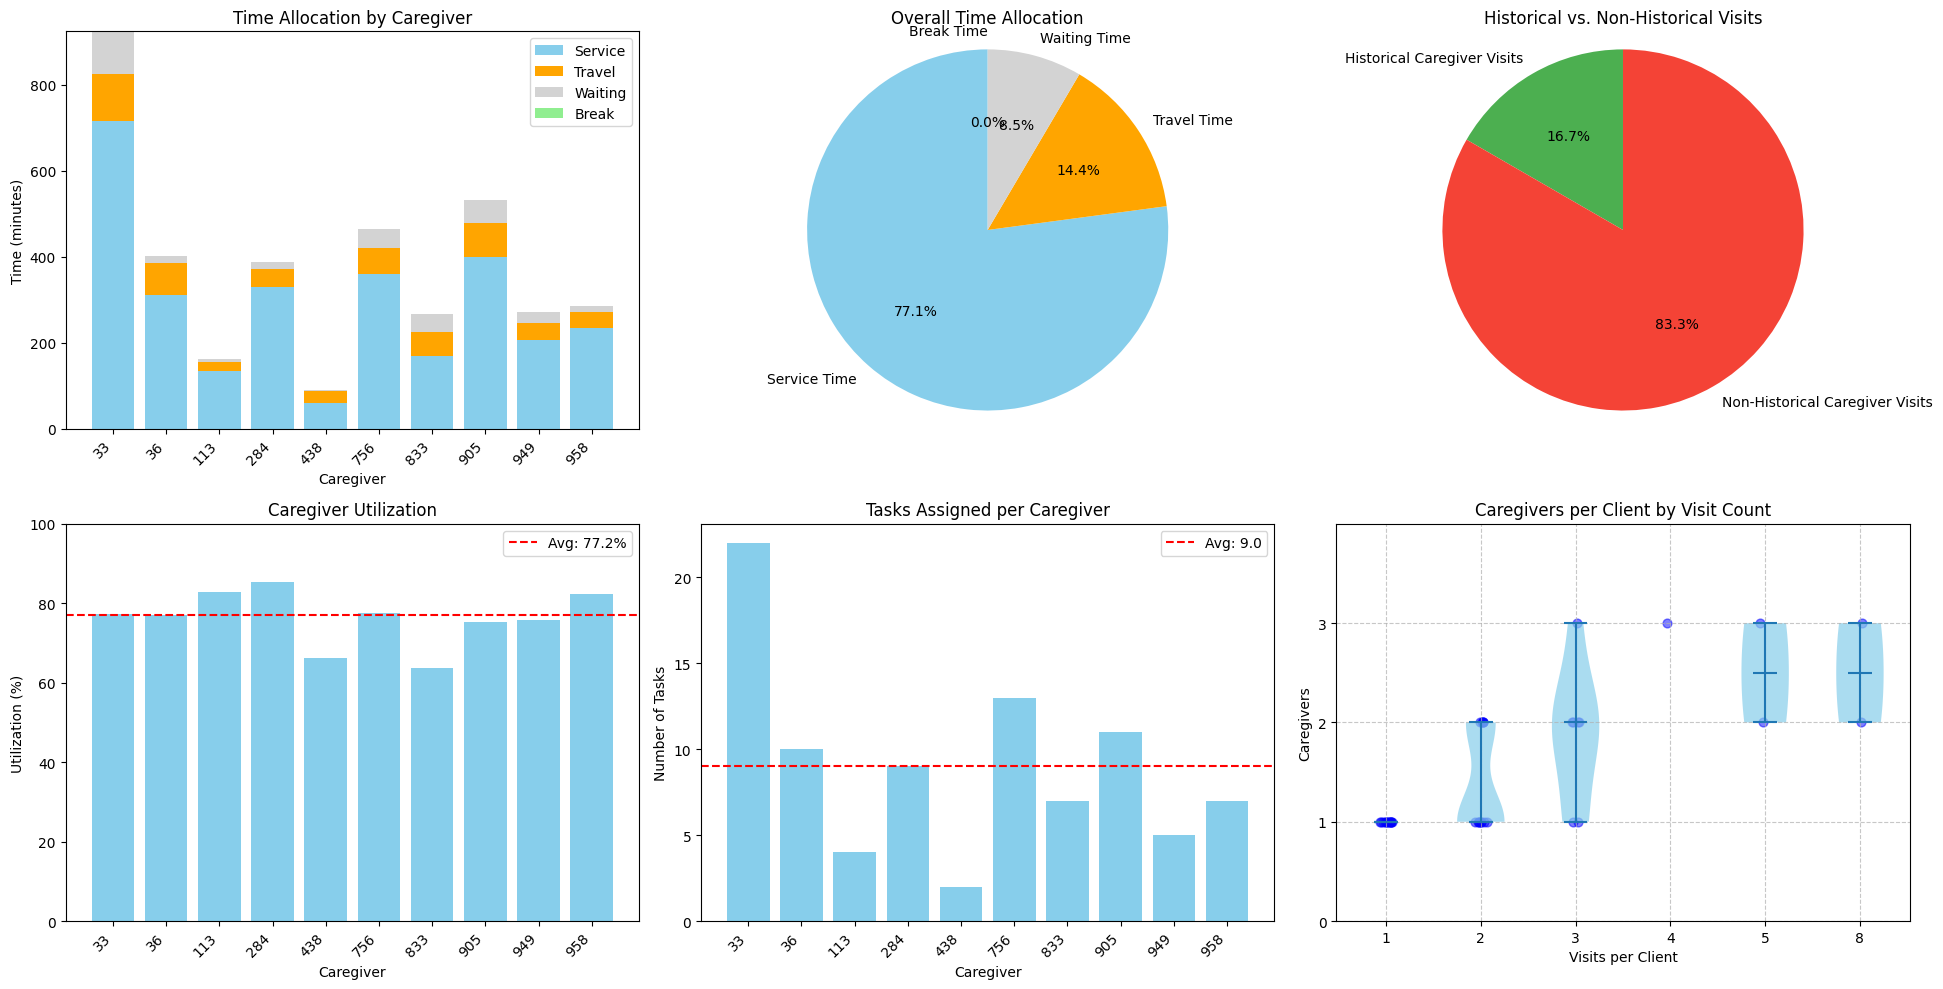

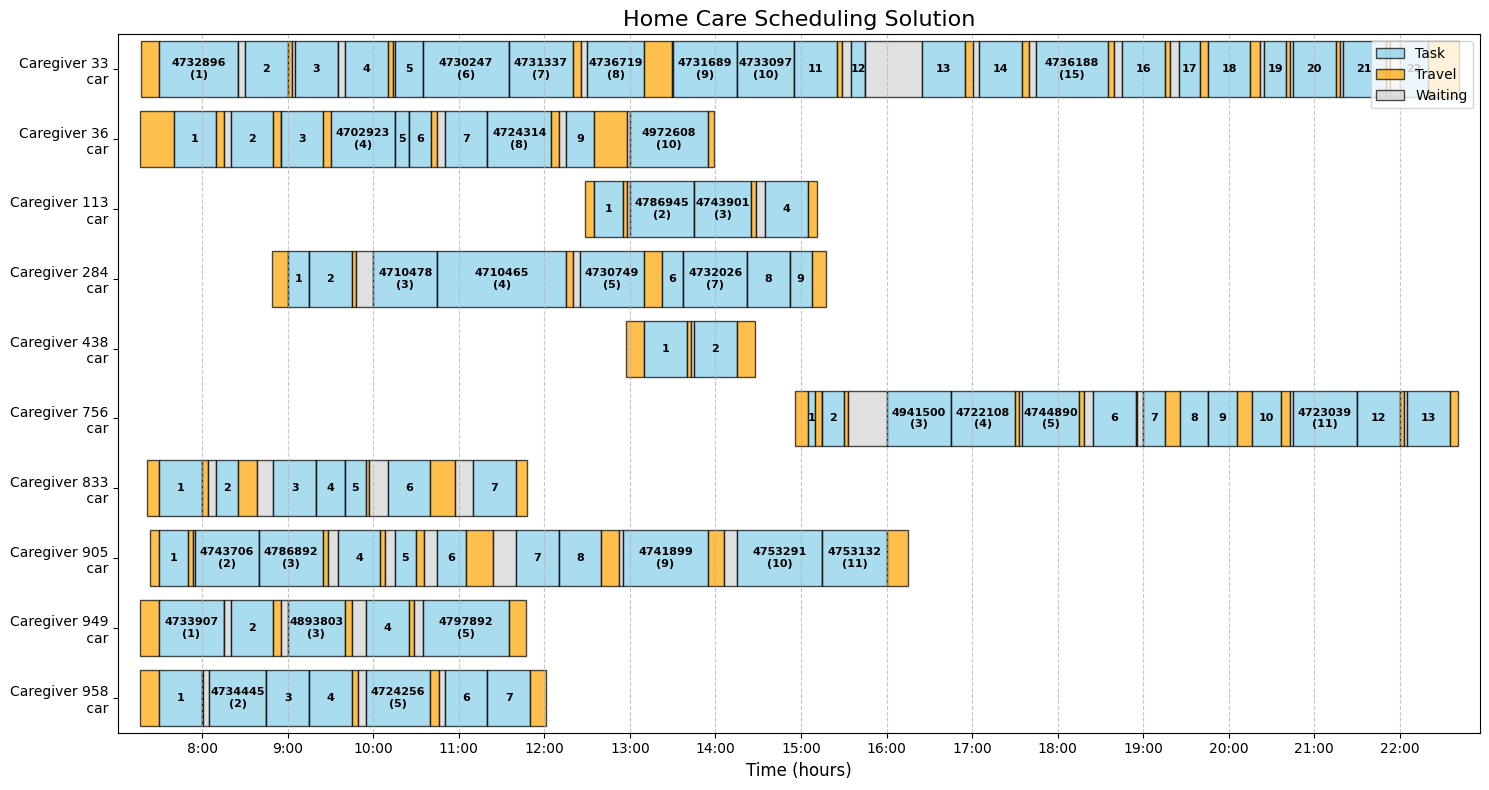

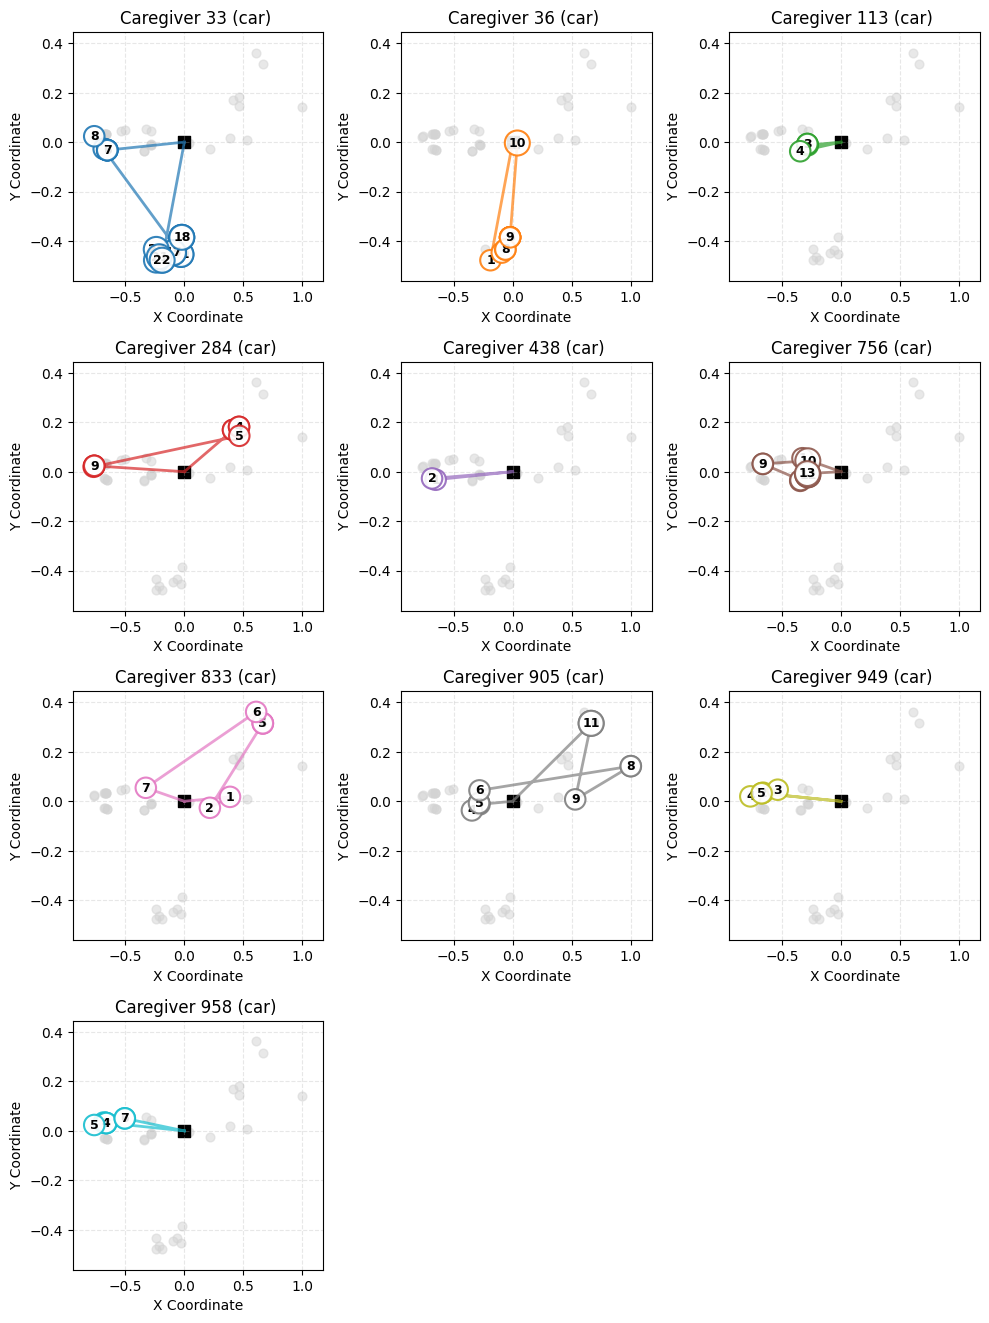

In [64]:
from utils.visualization import visualize_schedule, visualize_metrics, visualize_routes, display_metrics_summary

model.get_solution()

display_metrics_summary(model)
visualize_metrics(model, display_mode='dashboard');
visualize_schedule(model);
visualize_routes(model, caregiver_ids=None, subplot_mode=True);

In [35]:
from utils.solution_storage import save_solution
save_solution(model, 'full_test_first_draft')

Solution saved to data/saved_solutions/20250331_081731_full_test_first_draft.json


'data/saved_solutions/20250331_081731_full_test_first_draft.json'

Caregiver 833 is cheating by -0.7833333333333332 minutes between 4725698 and 4693692
Caregiver 833 is cheating by -0.8499999999999996 minutes between 4723472 and 4887203
Caregiver 905 is cheating by -0.016666666666666666 minutes between 4753375 and 4730247
Caregiver 756 is cheating by -0.18333333333333357 minutes between 4727042 and 4702923
Caregiver 438 is cheating by -5.366666666666666 minutes between 4732377 and 4839793
Caregiver 438 is cheating by -0.18333333333333357 minutes between 4727518 and 4702239
Caregiver 958 is cheating by -0.13333333333333333 minutes between 4884667 and 4732026

                              HOME CARE SCHEDULE METRICS SUMMARY

SCHEDULE OVERVIEW:
  Total tasks:              90
  Active caregivers:        9/10

TIME ALLOCATION:
  Service time:             2920 min (74.8%)
  Travel time:              490 min (12.5%)
  Waiting time:             493 min (12.6%)
  Break time:               0 min (0.0%)
  Total schedule time:      3903 min

CONTINUITY METRICS:
 

<string>:245: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


(<Figure size 1000x1333.33 with 12 Axes>,
 (<Figure size 1000x1333.33 with 12 Axes>,
  array([<Axes: title={'center': 'Caregiver 33 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 36 (car)  (No Route)'}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 113 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 284 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 438 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 756 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 833 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 905 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 949 (car) '}, xlabel='

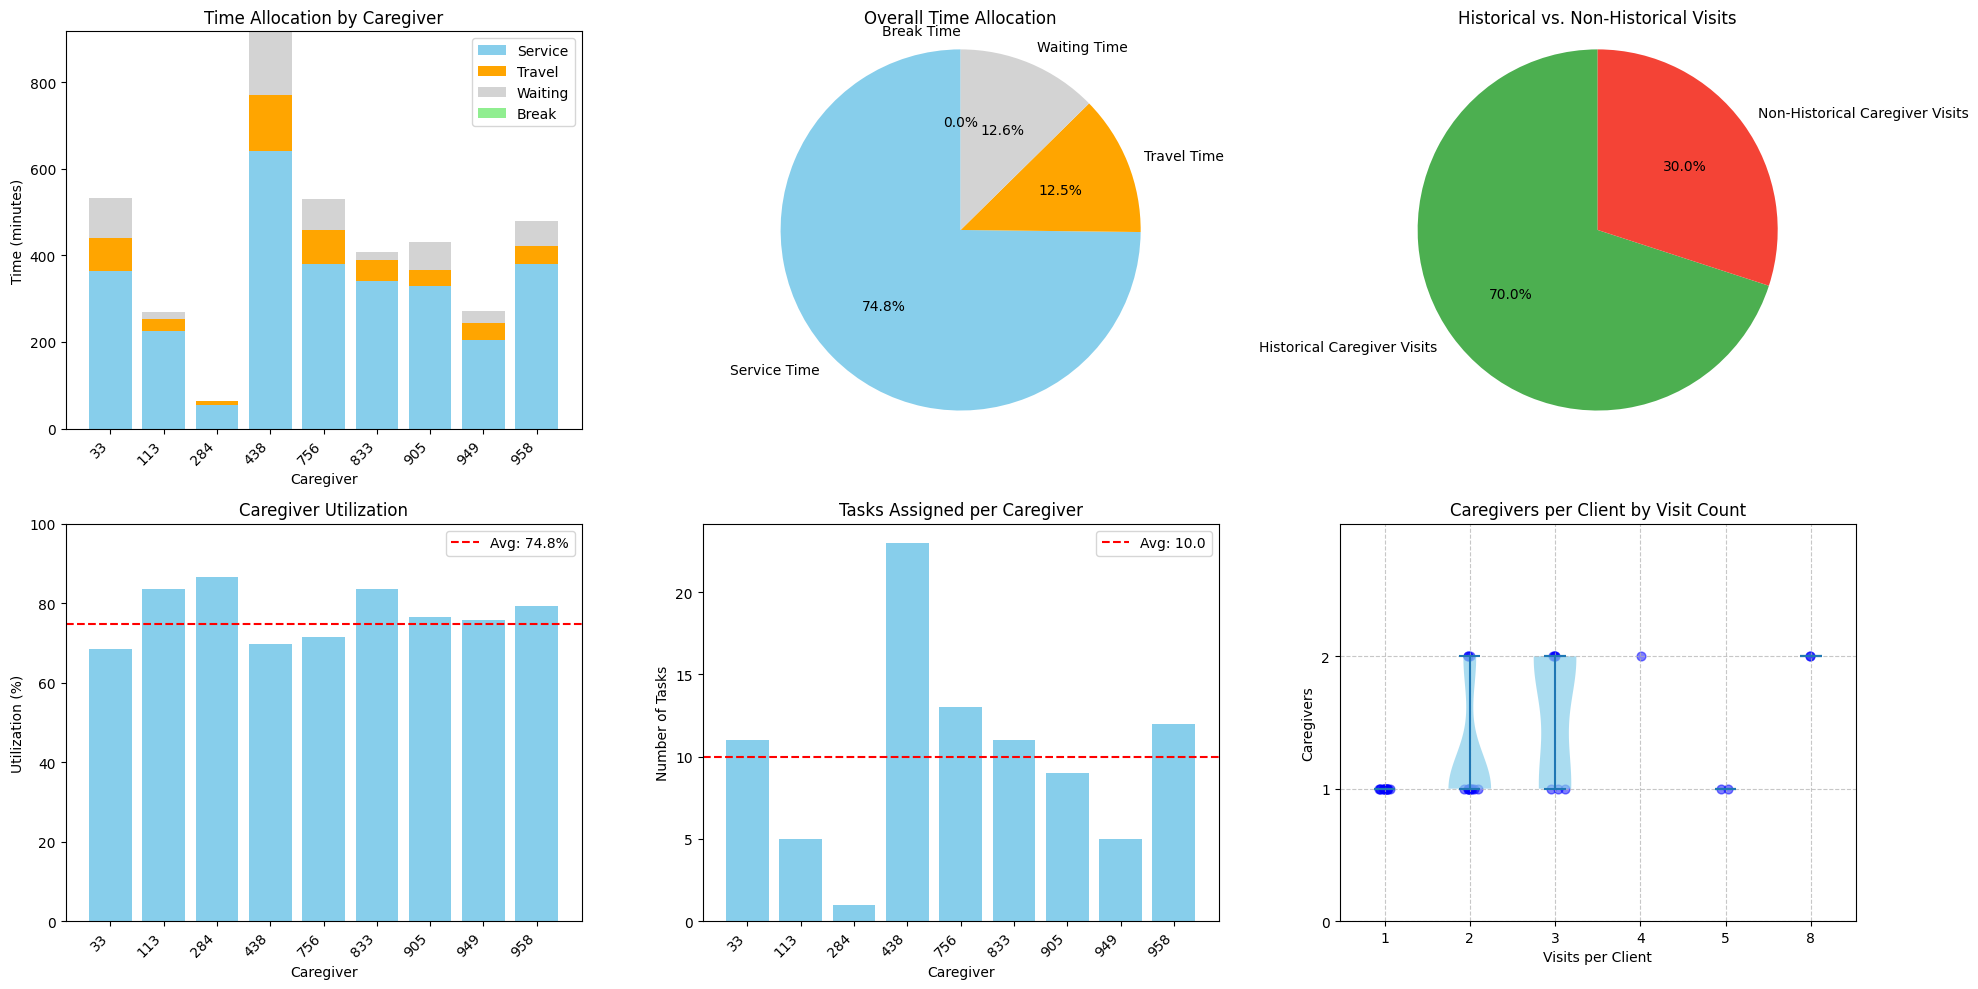

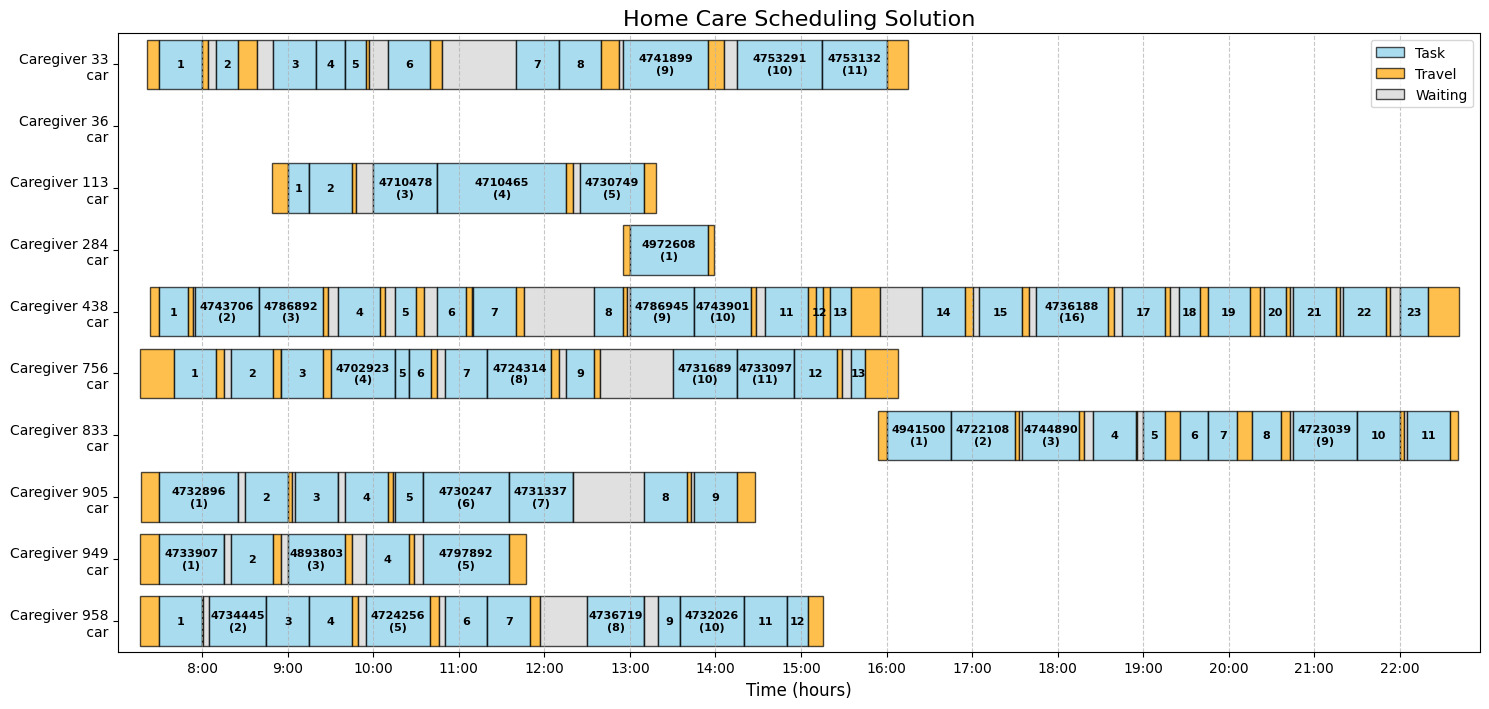

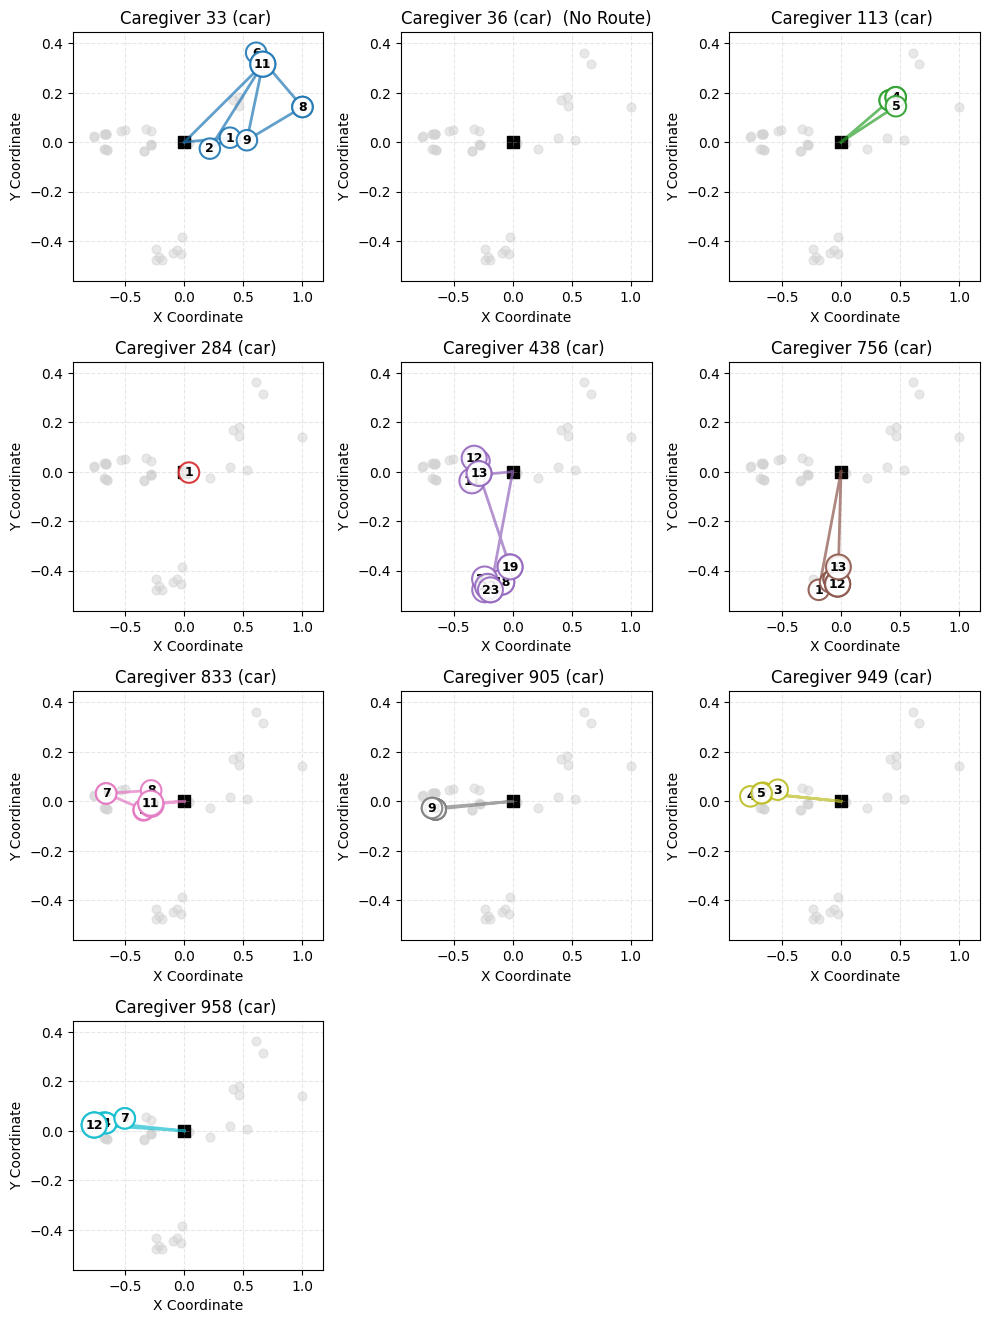

In [57]:
from utils.solution_storage import create_model_from_real_data

real_data_model = create_model_from_real_data(model.caregivers, model.tasks, model.clients, model.drive_time_matrix, model.walk_time_matrix, model.bicycle_time_matrix, model.continuity)

display_metrics_summary(real_data_model)
visualize_metrics(real_data_model, display_mode='dashboard')
visualize_schedule(real_data_model)
visualize_routes(real_data_model, caregiver_ids=None, subplot_mode=True)


In [58]:
# Display all tasks with PlannedCaregiverID 33, sorted by start_minutes
model.tasks[model.tasks['PlannedCaregiverID'] == 438].sort_values('start_minutes')


,ClientID,StartTime,EndTime,TaskType,PlannedCaregiverID,start_minutes,end_minutes,duration_minutes
ID,,,,,,,,
4940776,1453,2025-03-05T07:30:00+01:00,2025-03-05T07:50:00+01:00,Dubbelbemanning,438,450,470,20
4743706,396,2025-03-05T07:55:00+01:00,2025-03-05T08:40:00+01:00,Hemtjänst,438,475,520,45
4786892,396,2025-03-05T08:40:00+01:00,2025-03-05T09:25:00+01:00,Hemtjänst,438,520,565,45
4734848,1419,2025-03-05T09:35:00+01:00,2025-03-05T10:05:00+01:00,Hemtjänst,438,575,605,30
4885322,396,2025-03-05T10:15:00+01:00,2025-03-05T10:30:00+01:00,Hemtjänst,438,615,630,15
4887383,1464,2025-03-05T10:45:00+01:00,2025-03-05T11:05:00+01:00,Hemtjänst,438,645,665,20
4735978,1467,2025-03-05T11:10:00+01:00,2025-03-05T11:40:00+01:00,Hemtjänst,438,670,700,30
4941319,1453,2025-03-05T12:35:00+01:00,2025-03-05T12:55:00+01:00,Dubbelbemanning,438,755,775,20
4786945,396,2025-03-05T13:00:00+01:00,2025-03-05T13:45:00+01:00,Hemtjänst,438,780,825,45
